## About the data

**Dataset 1**

Shipping intensity in the Pacific Arctic region during August 2017.

The value in each raster cell represents teh total lenght, in meters, of all vessel tracks within each cell. 

Resolution: 1km/pxl

**Dataset 2**

Vector data shwoing statistical areas dividing waters of the State of Alaska and adhacent zone into small units for the purpose of harvesting and analyzing fishery harvest.

Format: GeoPackage (extension .gpkg). Open, non-proprietary, platform-independents, self-describing format. Supports both raster and vector data. 

**Dataset 3**

Polygon showing Alaskas boundary from 2022 US Census Tiger shapefile, updates CRS.

# Import Libraries

In [38]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for creating legends

import xarray as xr
import rioxarray as rioxr
import geopandas as gpd

from rasterio.features import rasterize # for rasterizing polygons 

In [5]:
# show all columns
pd.set_option('display.max_columns', None)

# Import Data

In [13]:
raw_dist = rioxr.open_rasterio('https://arcticdata.io/metacat/d1/mn/v2/object/urn%3Auuid%3A0d223f34-77fc-4ebe-8a58-459b7e575668')
raw_dist

<xarray.DataArray (band: 1, y: 2308, x: 3087)>
[7124796 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -2.55e+06 -2.549e+06 ... 5.347e+05 5.357e+05
  * y            (y) float64 2.711e+06 2.71e+06 ... 4.053e+05 4.043e+05
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  2564975.75
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   nan
    _FillValue:          -3.4e+38
    scale_factor:        1.0
    add_offset:          0.0

In [16]:
# open fishing areas polygons 
fishing_areas = gpd.read_file(os.path.join(os.getcwd(),
                                          'data', 
                                           'Alaska_Commercial_Salmon_Boundaries.gpkg'))
fishing_areas.head()

,OBJECTID,GEOMETRY_START_DATE,GEOMETRY_END_DATE,STAT_AREA,STAT_AREA_NAME,FISHERY_GROUP_CODE,GIS_SERIES_NAME,GIS_SERIES_CODE,REGION_CODE,REGISTRATION_AREA_NAME,REGISTRATION_AREA_CODE,REGISTRATION_AREA_ID,REGISTRATION_LOCATION_ABBR,MANAGEMENT_AREA_NAME,MANAGEMENT_AREA_CODE,DISTRICT_NAME,DISTRICT_CODE,DISTRICT_ID,SUBDISTRICT_NAME,SUBDISTRICT_CODE,SUBDISTRICT_ID,SECTION_NAME,SECTION_CODE,SECTION_ID,SUBSECTION_NAME,SUBSECTION_CODE,SUBSECTION_ID,COAR_AREA_CODE,CREATOR,CREATE_DATE,EDITOR,EDIT_DATE,COMMENTS,STAT_AREA_VERSION_ID,Shape_Length,Shape_Area,geometry
0,12,1975-01-01 00:00:00+00:00,NaT,33461,Tanana River mouth to Kantishna River,B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,6 District,Y-6,None,6-A Subdistrict,6-A,None,,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,"Yukon District, 6 Subdistrict and 6-A Section ...",None,4.610183,0.381977,"MULTIPOLYGON (((-151.32805 64.96913, -151.3150..."
1,13,1975-01-01 00:00:00+00:00,NaT,33462,Kantishna River to Wood River,B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,6 District,Y-6,None,6-B Subdistrict,6-B,None,,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,"Yukon District, 6 Subdistrict and 6-B Section ...",None,3.682421,0.321943,"MULTIPOLYGON (((-149.96255 64.70518, -149.9666..."
2,18,1978-01-01 00:00:00+00:00,NaT,33431,Toklik to Cottonwood Point,B,Salmon,B,3,Yukon Area,Y,None,None,Lower Yukon,YL,3 District,Y-3,None,,None,None,None,None,NaN,None,None,None,YL,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,Yukon District and 3 Subdistrict until 1/1/1980,None,2.215641,0.198740,"MULTIPOLYGON (((-161.39853 61.55463, -161.4171..."
3,19,1980-01-01 00:00:00+00:00,NaT,33442,"Right Bank, Bishop Rock to Illinois Creek",B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,4 District,Y-4,None,4-B Subdistrict,4-B,None,None,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,None,None,9.179852,0.382788,"MULTIPOLYGON (((-153.15234 65.24944, -153.0761..."
4,20,1980-01-01 00:00:00+00:00,NaT,33443,"Left Bank, Cone Point to Illinois Creek",B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,4 District,Y-4,None,4-B Subdistrict,4-B,None,None,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,None,None,9.500826,0.378262,"MULTIPOLYGON (((-152.99905 65.17027, -152.9897..."


In [19]:
# open Alaska boundary 
ak = gpd.read_file(os.path.join(os.getcwd(), 
                               'data',
                               'alaska_perimeter',
                               'alaska_perimeter.shp'))
ak

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,02,01785533,02,AK,Alaska,00,G4000,A,1478943541175,245377731557,+63.3473560,-152.8397334,"MULTIPOLYGON (((-1728945.561 474182.534, -1728..."


## Fishing areas preparations

### Update columns names and crs 

In [23]:
# make column names small caps
fishing_areas.columns = fishing_areas.columns.str.lower()
print(fishing_areas.columns)

Index(['objectid', 'geometry_start_date', 'geometry_end_date', 'stat_area',
       'stat_area_name', 'fishery_group_code', 'gis_series_name',
       'gis_series_code', 'region_code', 'registration_area_name',
       'registration_area_code', 'registration_area_id',
       'registration_location_abbr', 'management_area_name',
       'management_area_code', 'district_name', 'district_code', 'district_id',
       'subdistrict_name', 'subdistrict_code', 'subdistrict_id',
       'section_name', 'section_code', 'section_id', 'subsection_name',
       'subsection_code', 'subsection_id', 'coar_area_code', 'creator',
       'create_date', 'editor', 'edit_date', 'comments',
       'stat_area_version_id', 'shape_length', 'shape_area', 'geometry'],
      dtype='object')


In [27]:
# check crs
print(f"raw_dist: {raw_dist.rio.crs}\nak: {ak.crs}\nfishing_areas: {fishing_areas.crs}\n")

raw_dist: EPSG:3338
ak: epsg:3338
fishing_areas: epsg:4326



CRS match:  True


<AxesSubplot:>

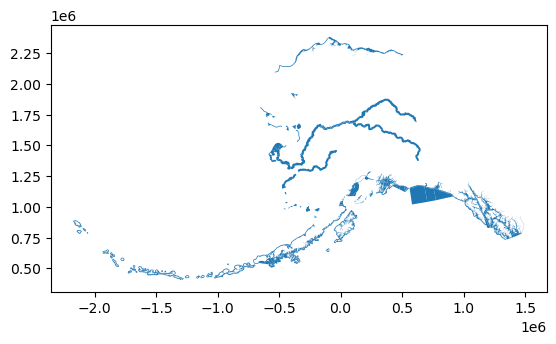

In [31]:
# transform fishing areas crs to 3338
fishing_areas = fishing_areas.to_crs(ak.crs)

# check if they match
print('CRS match: ', raw_dist.rio.crs == fishing_areas.crs)

fishing_areas.plot()

### Data Selection

Working with data from Kodiak registration area.

In [33]:
# registration areas:
print(fishing_areas.registration_area_name.unique())

['Yukon Area' 'Kuskokwim Area' 'Prince William Sound Area'
 'Bristol Bay Area' 'Chignik Area' 'Kodiak Area' 'Alaska Peninsula Area'
 'Cook Inlet Area' 'Norton Sound-Port Clarence Area'
 'Arctic-Kotzebue Area' 'Aleutian Islands Area' 'Atka-Amlia Islands Area'
 'Southeastern Alaska Area']


In [35]:
# select Kodiak
kodiak = fishing_areas[fishing_areas.registration_area_name == "Kodiak Area"]
print('# geometries in Kodiak area ', len(kodiak))

# geometries in Kodiak area  118


## Plot of Kodiak fishing area

One way to add a custom legend is to create a `Patch` object for each geometry in our plot. 

We can create a `Patch` with a custom color in label via `mpatches.Patch()`:

```python
great_patch = mpatches.Patch(color = great_color, 
                            label = 'great_label')
```

To add this patch the legend, we need to create axis. (eg. calling `fig, ax = plt.subplots()`) at the beginning of our plot. Then we add our plot to our legend like this:

```python
ax.legend(handles = [great_patch]) # make handles = list with pach or a number of patches
```

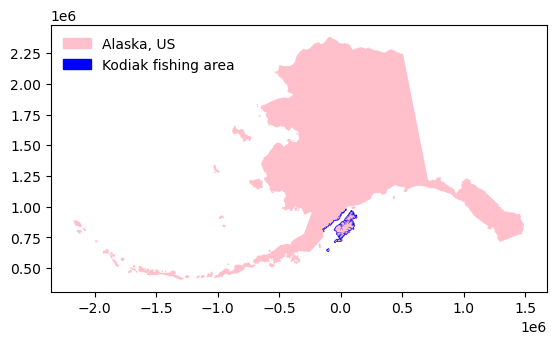

In [43]:
fig, ax = plt.subplots()
# ------------------------
ak.plot(ax = ax, color = 'pink')
ak_patch = mpatches.Patch(color = 'pink',
                         label = 'Alaska, US')
# ------------------------
kodiak.plot(ax = ax, color = 'blue')
kodiak_patch = mpatches.Patch(color = 'blue',
                         label = 'Kodiak fishing area')
# ------------------------
# create legend 
ax.legend(handles = [ak_patch, kodiak_patch], 
          frameon = False, # the boundary around the legend
          loc = 'upper left')

# ------------------------
plt.show()

## Disolve and explode polygons 

The Kodiak data is too granular for our purposes: we want to get statitics on distance travelled on each fishing district. 

In [44]:
# check number of districts and tows
print(f"number of geometries: {len(kodiak)}")
print(f"number of districts: {len(kodiak.district_name.unique())}")

number of geometries: 118
number of districts: 7


We can aggergate the geometries based on the values of a column using the `dissolve()` method. We will disolve by district name:

In [50]:
# dissolve by district name

districts = kodiak[["geometry", 'district_name']].dissolve(by = "district_name",
                                                          as_index = False) # want to keep row index
districts

,district_name,geometry
0,Afognak District,"POLYGON ((117320.445 935905.028, 117387.891 93..."
1,Alitak Bay District,"POLYGON ((-20734.052 769618.550, -20652.681 76..."
2,Eastside Kodiak District,"MULTIPOLYGON (((-100323.045 633409.206, -10041..."
3,Mainland District,"MULTIPOLYGON (((-134659.359 791834.058, -13771..."
4,Northeast Kodiak District,"POLYGON ((113349.628 855371.323, 113490.376 85..."
5,Northwest Kodiak District,"POLYGON ((7822.482 849511.733, 7817.541 849495..."
6,Southwest Kodiak District,"POLYGON ((-31173.650 786489.038, -31165.811 78..."


<AxesSubplot:>

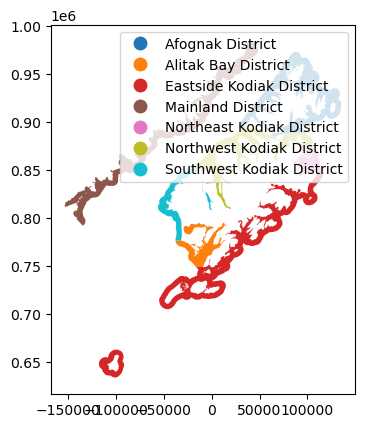

In [52]:
districts.plot(column = 'district_name', # color by district name 
              legend = True)

Lets look at the districts:

We can control the legend location adding `loc` and `bbox_to_anchor` to `legend_kwds`

It can be useful to use both of these together.

`loc`: indicate the corner of the legend box we are alligning.

`bbox_to_anchor`: is a tuple with coordinates of where to place the corner specified in `loc`. Values between 0 and 1 are *inside* the plot(inside the axes)

<AxesSubplot:>

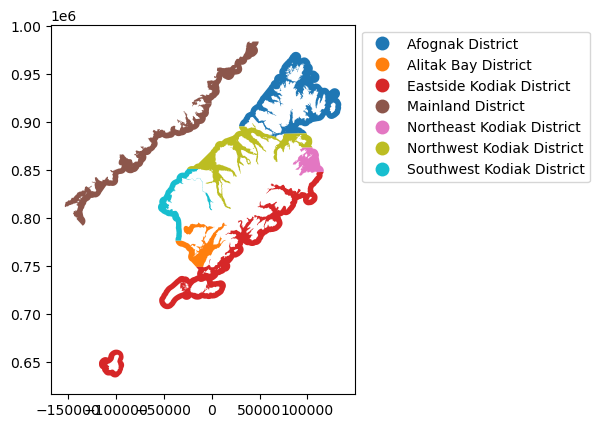

In [57]:
districts.plot(column = 'district_name', # color by district name 
              legend = True,
              legend_kwds = {'loc': 'upper left', # this is the starting point
                            'bbox_to_anchor':(1,1)}) # x, y position on the axis q

Notice some of our districts are multipolygons. To simplify our analusis (and for the purpose of this lecture) we will separate each multipolygon into individual polygons.

use `explode()` from `gpd.GeoDataFrame`

In [60]:
# separate districts that were multiploygons into multiple rows
# one polygon for each row
districts = districts.explode(ignore_index = True)
districts

,district_name,geometry
0,Afognak District,"POLYGON ((117320.445 935905.028, 117387.891 93..."
1,Alitak Bay District,"POLYGON ((-20734.052 769618.550, -20652.681 76..."
2,Eastside Kodiak District,"POLYGON ((-100323.045 633409.206, -100419.680 ..."
3,Eastside Kodiak District,"POLYGON ((-14244.415 714649.799, -14326.870 71..."
4,Mainland District,"POLYGON ((-134659.359 791834.058, -137719.352 ..."
5,Mainland District,"POLYGON ((-13345.174 922271.590, -13358.061 92..."
6,Northeast Kodiak District,"POLYGON ((113349.628 855371.323, 113490.376 85..."
7,Northwest Kodiak District,"POLYGON ((7822.482 849511.733, 7817.541 849495..."
8,Southwest Kodiak District,"POLYGON ((-31173.650 786489.038, -31165.811 78..."


## Distance raster preparation

### Squeeze
First we need to remove the band. This dimension interferes when we try to plot these.

In [62]:
raw_dist = raw_dist.squeeze().drop('band')

In [65]:
raw_dist
# to check 
print(f"After aqueee:\ndimensions {raw_dist.dims}\ncoords: {raw_dist.coords}")

After aqueee:
dimensions ('y', 'x')
coords: Coordinates:
  * x            (x) float64 -2.55e+06 -2.549e+06 ... 5.347e+05 5.357e+05
  * y            (y) float64 2.711e+06 2.71e+06 ... 4.053e+05 4.043e+05
    spatial_ref  int64 0


## Updating no-data values

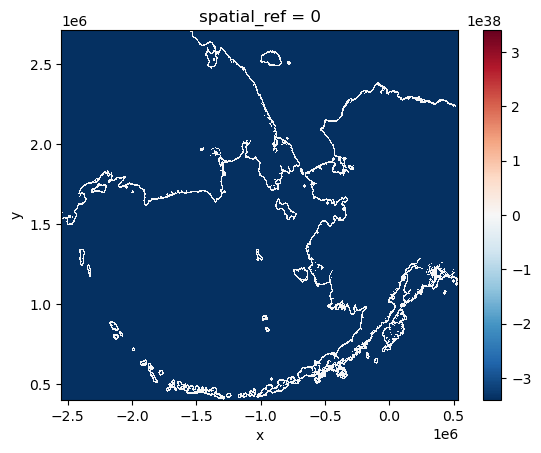

In [66]:
raw_dist.plot()

This plot looks really wrong. Only plotting 0 and -3 values, but its expressing distance so that doesnt make sense. Some data is being obscured. 

In [75]:
# check min and max values
print(f"min : {raw_dist.min().item()}\nmax: {raw_dist.max().item():,}") # adds comma

# store no data values
nodata = raw_dist.rio.nodata
print(f"'no-data values are' {nodata}")

We can select all pixels with raster data using the `where()` method. 

By default, `where()` will place `np.nan` (NAs) at every cell that does not satisfy the condition:

In [76]:
# keep pixels where values are different than the no-data values
raw_dist.where(raw_dist != nodata)

<xarray.DataArray (y: 2308, x: 3087)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * x            (x) float64 -2.55e+06 -2.549e+06 ... 5.347e+05 5.357e+05
  * y            (y) float64 2.711e+06 2.71e+06 ... 4.053e+05 4.043e+05
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  2564975.75
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   nan
    _FillValue:          -3.4e+38
    scale_factor:        1.0
    add_offset:          0.0

In [82]:
raw_dist = raw_dist.where(raw_dist != nodata).plot()

AttributeError: 'QuadMesh' object has no attribute 'where'

## Clipping the raster

In [81]:
kodiak_dist = raw_dist.rio.clip_box(*districts.total_bounds)
kodiak_dist

AttributeError: 'QuadMesh' object has no attribute 'rio'